[View in Colaboratory](https://colab.research.google.com/github/akamloo/ML-Practice/blob/master/Support_Vector_Machine_(SVM)_Algorithm.ipynb)

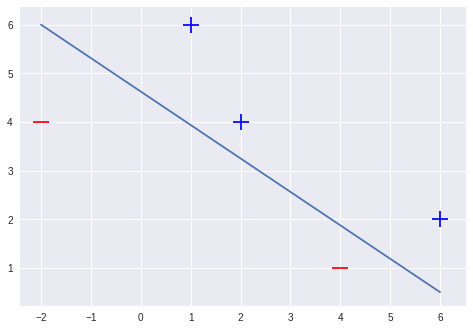

In [90]:
  import numpy as np
  from matplotlib import pyplot as plt
  
  X = np.array([[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])
  
  y = np.array([-1,-1,1,1,1])

  for d, sample in enumerate(X):
    if d < 2:
      plt.scatter(sample[0], sample[1], s=250, marker="_", linewidths=2, color="red")
    else:
      plt.scatter(sample[0], sample[1], s=250, marker="+", linewidths=2, color="blue")
  # Print a possible hyperplane, that is seperating the two classes.
  #we'll two points and draw the line between them (naive guess)
  plt.plot([-2,6],[6,0.5])

In [0]:
def svm_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i] * np.dot(X[i], w))<1:
            #missclassified weights
                w = w+ eta *((X[i] * Y[i]) + (-2 * (1/epoch) *w ))
                error = 1
            else:
                w = w + eta *(-2 * (1/epoch) *w)
        errors.append(error)
    

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()

    return w

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


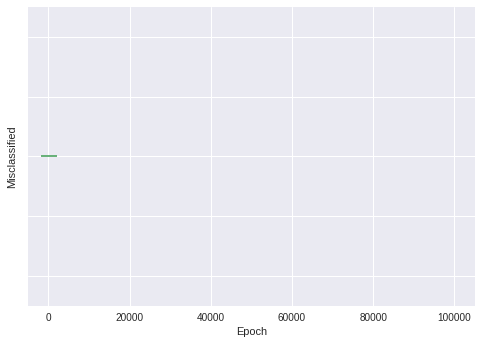

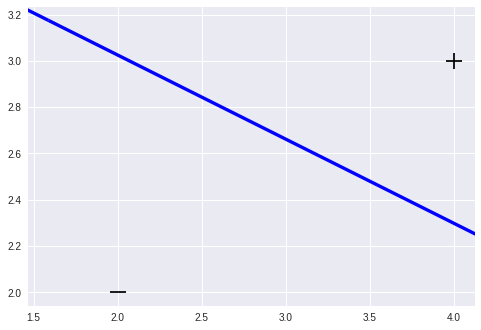

In [92]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=250, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=250, marker='+', linewidths=2)

w = svm_plot(X,y)
# Add our test samples
plt.scatter(2,2, s=250, marker='_', linewidths=2, color='black')
plt.scatter(4,3, s=250, marker='+', linewidths=2, color='black')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')